In [1]:
import numpy as np
import math as math

'''
This function is to generate data with binary label, based on the model of Logistic Regression
'X' is sampled from a uniform distribution between [0,1]
hypothesis 'h' is generated from a integer uniform distribution between [-5,5]
the noise level 'sigma' is generated from a normal distribution with mean 0 and std sigma
label y is generated in the way below:
first generate y_linear=X*w+sigma as a linear problem
and then use logistic regression model to transform y_linear to a probability between [0,1]
and then generate a variable 'e' uniformly from [0,1], 
if y_linear>e ,set the label to be 1, otherwise set the label to be 0.

Input: number of samples N,dimension of data d, noise level sigma

Output: generate X, label y, realy hypothesis h
'''

def generate_data_lr(N,d,sigma):
    # generate X uniform distributed between[-1,1]
    X=np.random.uniform(-1,1,size=(N,d))
    # generate noise normal distributed, mean 0, variance sigam^2
    noise=np.random.normal(0.0,sigma,(N,1))
    # add a collumnn of b so that the model is y=X*beta+b, 
    b=np.ones((N,1))
    X_modify=np.concatenate((X,b),axis=1)
    # generate hypothesis of the linear classification, it is d+1 dimension vector
    h=np.random.uniform(-5.0,5.0,size=(d+1,1))
    # generate value of y if it is a linear regression problem
    y_linear=np.dot(X_modify,h)+noise
    # transform y_linear into a  0-1 label based on logistic regression model
    y=1 / (1 + np.exp(-y_linear))
    for i in range(0,N):
        e=np.random.uniform(0,1,size=(1,1))
        if y[i,0]>=e:
            y[i,0]=1
        else:
            y[i,0]=0
    
    return X,y,h





'''
function generate_cost_SampleGroup is to generate cost correlated with their group
first randomly assign a group label for each sample, 
In each group, the cost is a normal distribution with a specific mean and variance
Input:
'Group_Number' is a integer showing the number of groups
'Cost_Mean' is a 1-D vector contains the cost mean of each group
'Cost_Var' is a 1-D vector contains the cost variance of each group
'X' generated data
'cost_sg' is a sample
'''


def generate_cost_SampleGroup(Group_Number,Cost_Mean,Cost_Var,X):
    # number of samples
    N=X.shape[0]
    # initialize the cost vector of data
    cost_sg=np.zeros((N,1))
    # randomly assign group label for each sample
    group_label=np.random.randint(1,Group_Number,(N,1))
    # sample the cost for each sample
    for i in range(0,N):
        mean=Cost_Mean[int(group_label[i,0]),0];
        var=Cost_Var[int(group_label[i,0]),0];
        cost=np.random.normal(mean,var,1);
        cost_sg[i,0]=cost;
    
    cost_sg=cost_sg/np.sum(cost_sg, axis=0)*N
    return cost_sg

'''
function convex_cff and linear_cff are two functions that map a specific feature to a cost
Input 'a','b','c' the parameter in the function ,'x' the feature
'''

def convex_cff(a,b,c,x):
    cost=a*np.multiply(x,x)+b*x+c
    return cost

def linear_cff(a,b,x):
    cost=a*x+b
    return cost

'''
This function is for generate features correlated with features, 
Input: X, generated features
       coeff: cost function parameter for every feature,
       for exaple, if I use convex_cff, then for each feature i I have [coeff[i,0],coeff[i,1],coeff[i,2]]
       corresponding to a,b c in the function
       w: weight parameter for every features
Output: the normalized output cost correlated with features
'''


def generate_cost_Features(X,coeff,w):
    N=X.shape[0]
    d=X.shape[1]
    # calculate the cost for each features
    for i in range(0,d):
        X[:,i]=convex_cff(coeff[i,0],coeff[i,1],coeff[i,2],X[:,i])
    cost_fts=np.dot(X,w)
    # normalized cost, for each data set the total cost is the number of its data points
    cost_fts=cost_fts/np.sum(cost_fts, axis=0)*N
    return cost_fts

In [27]:
#Initialize the number of samples, data points and noise level
N=10000
d=5
sigma=0.01
# generate data based on logistic regression model
[X_lr,y_lr,h_lr]=generate_data_lr(N,d,sigma)
print X_lr,y_lr
np.savetxt('X_lr.txt', X_lr, delimiter=',')
np.savetxt('y_lr.txt', y_lr, delimiter=',')
np.savetxt('h_lr.txt',h_lr,delimiter=',')

#Initialize the parameter for generate the cost correlated with sample groups
Group_Number=5;
Cost_Mean=np.random.randint(5,10,(Group_Number,1))
sigma_cost=0.01
Cost_Var=sigma_cost*np.random.randint(1,5,(Group_Number,1))
cost_sg=generate_cost_SampleGroup(Group_Number, Cost_Mean,Cost_Var,X_lr)
print cost_sg   
np.savetxt('cost_sg.txt', cost_sg, delimiter=',')

#Initialize the parameter for generate the cost correlated with features
Group_Number=5;
coeff=np.random.uniform(0.0,1.0,(d,3))
w=np.random.uniform(0.0,1.0,(d,1))
cost_fts=generate_cost_Features(X_lr,coeff,w)
print cost_fts
np.savetxt('cost_fts.txt', cost_fts, delimiter=',')

[[-0.92711191  0.52823456 -0.84195288 -0.50882052  0.68765288]
 [ 0.42468134 -0.92163989  0.72315875 -0.33188374 -0.01161615]
 [ 0.13243534 -0.22824276  0.28808314 -0.6732574   0.61992784]
 ..., 
 [ 0.83489957  0.42418007 -0.72573145  0.24859215  0.51895011]
 [-0.88537941  0.80247989 -0.36503104 -0.42941014 -0.6434581 ]
 [ 0.03722929 -0.51082025  0.03310437  0.48793054 -0.07286725]] [[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 0.]
 [ 1.]]
[[ 1.03794552]
 [ 1.03787485]
 [ 1.03488184]
 ..., 
 [ 1.03305227]
 [ 1.03177359]
 [ 0.77641804]]
[[ 1.19253475]
 [ 0.94436918]
 [ 1.15933325]
 ..., 
 [ 1.19473433]
 [ 0.81847624]
 [ 0.80868319]]


NameError: name 'x_lr' is not defined

In [3]:
import random
import numpy as np 

class GradientDescent(object):
    """
    Implementation of a gradient descent algorithm for binary classification.
    The loss function is 1 if classified incorrectly, 0 if correctly,
      but use a hinge loss for training.
    Initialized with a list of digits to be labeled positively
      (all others negatively).
    The algorithm initializes self.w to be a vector of 0's.
    Then for each of a sequence of rounds, check if the loss is positive;
        if so do a gradient descent update.
    Supports methods:
        reset(eta)
        norm_grad_loss(x, y)
        test_error(X, Y)
        data_update(x, y, importance_wt)
        null_update()
    """
    def __init__(self, num_features, pos_labels, eta=0.1):
        # num_features = length of the x vector
        # pos_labels   = list of digits in [0,9] to label positively (others negatively)
        self.num_features = num_features
        self.binarized_labels = [1.0 if l in pos_labels else -1.0 for l in range(10)]
        self.reset(eta)
        super(GradientDescent, self).__init__()

    def reset(self, eta):
        self.eta = eta
        self.w = np.zeros(self.num_features)
        self.avg_w = self.w
        self.steps = 0
    
    # predict on only a single datapoint, using avg_w
    def _predict_one(self,x):
        return np.sign(self.avg_w.dot(x))

    # predict on a matrix of data (shape is numdata * numfeatures)
    def _predict(self,X):
        Ypreds = np.apply_along_axis(self._predict_one, 1, X)
        return Ypreds

    # predict and report error on data (shape is numdata * numfeatures)
    def test_error(self, X, Y):
        Ypred = self._predict(X)
        return np.mean(map(lambda y : self.binarized_labels[y], Y) != Ypred)

    def _loss(self,x,biny):
        score = self.w.dot(x) * biny
        return max(1. - score, 0.)

    def _grad_loss(self, x, biny):
        # gradient of the loss
        loss = self._loss(x,biny)
        if loss > 0.:
            return -biny * x
        return np.zeros(self.num_features)

    def norm_grad_loss(self, x, y):
        # l2 norm of the gradient of the loss
        return np.linalg.norm(self._grad_loss(x,self.binarized_labels[y]))

    def _step(self):
        # every step, whether we got a data_update or a null_update, we need to
        # step the average
        self.avg_w = (self.avg_w * self.steps + self.w) / float(self.steps + 1.0)
        self.steps += 1

    # Do an importance-weighted gradient descent update on the hypothesis
    def data_update(self, x, y, importance_wt):
        biny = self.binarized_labels[y]
        loss = self._loss(x,biny)
        if loss > 0.:
            step = self.eta * self._grad_loss(x, biny)
            self.w = self.w - step / importance_wt
        self._step()

    # Do an update with no new data
    def null_update(self):
        self._step()



In [8]:
import random
import numpy as np 

# Rather than initializing with prior knowledge, we simply estimate gamma
# online with a simple heuristic and set the normalizer K accordingly.

# Estimating gamma:
# We are using an importance-weighted estimate of gamma from the past data, i.e:
#   gamma = (1/(# steps))*(sum_{t < now} {0 if we did not observe t,  else this_round_gamma / q_t}
# where this_round_gamma = Delta(h_t,loss(.,z_t)) * (2sqrt(cmax) - sqrt(max(c*, c_t)))
# and   q_t = Pr[ we posted a price higher than c_t for z_t ].

# We also allow for discounting of past data by use of a discount factor.
# This allows for forgetting past data as things change. Thus, the actual estimate is
#   numerator = sum_{t <= s} discount^{s-t} {0 if not observe t, else .... }
#   denominator = sum_{t <= s} discount^{s-t}
#   gamma = numerator / denominator
# For the paper we used discount=1, which reduces to the first, simpler estimator.

# We initialize the numerator by 0 and denominator by a + b * T^c,
# which is intended to act as a regularizer so we start with some momentum to buy points
# and slowly decrease the buying rate as appropriate.


INIT_GAMMA_A = 10.0
INIT_GAMMA_B = 0.00001
INIT_GAMMA_C = 0.1
DISCOUNT = 1.0  # a discount factor for estimating gamma, if < 1, then old data is slowly forgotten

class OurMech(object):
    """
    This is our mechanism.
    It is initialized for either the usual setting (default),
  or "at-cost" (pay only the cost rather than your posted price).
    """
    def __init__(self, alg, seed, T=1, B=1, eta=0.1, cmax=1.0, atcost = False):
        self.alg = alg
        self.randgen = random.Random(seed)
        self.atcost = atcost
        self.reset(eta, T, B, cmax=cmax)
        super(OurMech, self).__init__()

    # cmax = maximum cost
    def reset(self, eta, T, B, cmax = 1.0):
        self.T = T
        self.B = B
        self.cmax = cmax
        self.spend = 0
        self.step = 0
        self.gamma_num = 0.0  # numerator
        self.gamma_den = INIT_GAMMA_A + INIT_GAMMA_B * float(T)**INIT_GAMMA_C
        self.gamma = self.gamma_num / self.gamma_den
        self.alg.reset(eta)

    # given quantile = Pr[price >= x], find and return x
    def _get_price(self, quantile, delta, K):
        if K == 0.0:
            return self.cmax
        val = delta / (K * quantile)
        return min(self.cmax , val ** 2.0)

    # return the probability price exceeds c
    def _prob_exceeds(self, c, delta, K):
        if K == 0.0 or c == 0.0:
            return 1.0
        return min(1.0 , delta / (K * c**0.5))

    # update our estimate of gamma (using it to set the normalizer K next round)
    def _update_gamma(self, cost, price, K, delta, prob_purchase):
        self.gamma_num *= DISCOUNT  # we will add something if we obtain the point
        self.gamma_den = self.gamma_den*DISCOUNT + 1.0
        if price >= cost:
            if self.atcost:
                self.gamma_num += delta * cost**0.5 / prob_purchase  # importance-weighted
            else:
                cstar = self.cmax if K == 0.0 else min(self.cmax, (delta / K)**2.0)
                self.gamma_num += delta * (2.0*self.cmax**0.5 - max(cost, cstar)**0.5) / prob_purchase
        self.gamma = self.gamma_num / self.gamma_den

    def _train(self, costs, Xtrain, Ytrain):
        for i in xrange(len(costs)):
            self.step += 1
            delta = self.alg.norm_grad_loss(Xtrain[i], Ytrain[i])
            c = costs[i]
            K = self.gamma * float(self.T - self.step) / (self.B - self.spend)
            quantile = self.randgen.random()
            price = self._get_price(quantile, delta, K)
            if price >= c:  # obtain the point
                prob_purchase = self._prob_exceeds(c, delta, K)
                self.alg.data_update(Xtrain[i], Ytrain[i], prob_purchase)
                if self.atcost:
                    self.spend += c
                else:
                    self.spend += price
                if self.spend >= self.B:
                    break
                self._update_gamma(c, price, K, delta, prob_purchase)
            else:
                self.alg.null_update()

    def train_and_get_err(self, costs, Xtrain, Ytrain, Xtest, Ytest):
        self._train(costs, Xtrain, Ytrain)
        return self.alg.test_error(Xtest, Ytest)

In [9]:
len(X_lr[0])

5

In [10]:
TRAIN_FRACTION = 0.1

In [11]:
import sys
import random
def gen_seed():
    return random.randint(0,sys.maxint-1)


In [12]:
mech = OurMech(GradientDescent(len(X_lr[0]), [1]), gen_seed())

In [13]:
budgets = map(float, [40, 80, 160, 320])


In [14]:
def split_dataset(Xlist, Ylist, costs):
    # divide the dataset into train and test
    num_train_points = int(len(Xlist) * TRAIN_FRACTION)
    indices = range(len(Xlist))
    random.shuffle(indices)
    Xtrain = [Xlist[i] for i in indices[0:num_train_points]]
    Ytrain = [Ylist[i] for i in indices[0:num_train_points]]
    Costtrain = [costs[i] for i in indices[0:num_train_points]]
    Xtest  = [Xlist[i] for i in indices[num_train_points:-1]]
    Ytest  = [Ylist[i] for i in indices[num_train_points:-1]]
    Costtest = [costs[i] for i in indices[num_train_points:-1]]
    return (Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest)


In [15]:
my_seed = gen_seed()  # so we can record it and reproduce the entire experiment
random.seed(my_seed)

In [16]:
Xlist = X_lr
Ylist = [int(y) for y in y_lr]
num_examples = [0]*2
for y in Ylist:
    num_examples[y] += 1    # labels are 0,...,9

In [17]:
errs = [0.0]*len(budgets)
squared_errs = [0.0]*len(budgets)


In [18]:
TRIALS = 10

In [19]:
(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_fts)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    print "TRIAL " + str(trial)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.0)
        temp = mech.train_and_get_err([i[0]/10 for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs[bi] += temp / float(TRIALS)
        squared_errs[bi] += temp*temp / float(TRIALS)


TRIAL 0
TRIAL 1
TRIAL 2
TRIAL 3
TRIAL 4
TRIAL 5
TRIAL 6
TRIAL 7
TRIAL 8
TRIAL 9


In [20]:
errs, squared_errs

([0.39142126902989222,
  0.23804867207467501,
  0.22401377930881211,
  0.21557950883431495],
 [0.16038290533226018,
  0.057298423633666454,
  0.050280206091721534,
  0.046479636876347381])

In [23]:
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline

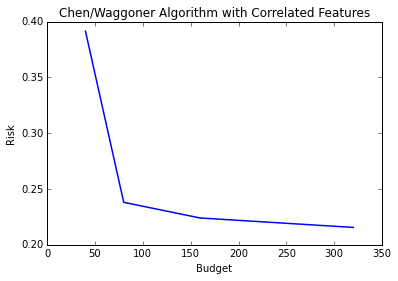

In [28]:
plt.plot(budgets,errs, linewidth=1.5)
plt.title("Chen/Waggoner Algorithm with Correlated Features")
plt.xlabel("Budget")
plt.ylabel("Risk")

In [29]:
(Xtrain,Ytrain,Costtrain, Xtest,Ytest, Costtest) = split_dataset(Xlist, Ylist, cost_sg)
T = len(Xtrain)
num_features = len(Xtrain[0])
avg_data_norm = np.apply_along_axis(np.linalg.norm, 1, Xtrain).mean()
eta = 0.1 / avg_data_norm  # rough heuristic, because the norm of the data is not normalized [0,1]

for trial in xrange(TRIALS):
    print "TRIAL " + str(trial)
    for bi,B in enumerate(budgets):
        mech.reset(eta, T, B, cmax=1.0)
        temp = mech.train_and_get_err([i[0]/10 for i in Costtrain], Xtrain, Ytrain, Xtest, Ytest)
        errs[bi] += temp / float(TRIALS)
        squared_errs[bi] += temp*temp / float(TRIALS)

TRIAL 0
TRIAL 1
TRIAL 2
TRIAL 3
TRIAL 4
TRIAL 5
TRIAL 6
TRIAL 7
TRIAL 8
TRIAL 9


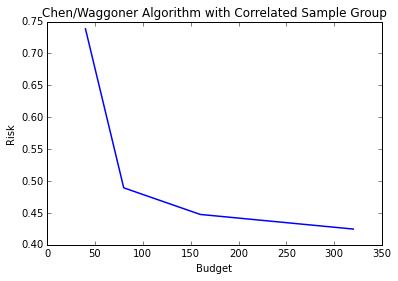

In [31]:
plt.plot(budgets,errs, linewidth=1.5)
plt.title("Chen/Waggoner Algorithm with Correlated Sample Group")
plt.xlabel("Budget")
plt.ylabel("Risk")